# EDA & data preparation

In this notebook I analysed dataset, enriched it with country's data and made the prepared dataset for model training

This notebook is converted to script [1_data_preparation.py](../scripts/1_data_preparation.py)

After running this notebooks creates two files:
- data/processed/main_data.csv
- data/processed/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
plt.rcParams["figure.figsize"] = (20, 10)

# Quick look on source data

In [3]:
df = pd.read_csv("../data/raw/car_purchasing.csv",encoding='ISO-8859-1')

In [4]:
df.head(3)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921


In [5]:
df.columns = df.columns.str.replace(" ", "_")\
                       .str.replace("-","")\
                       .str.lower()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_name        500 non-null    object 
 1   customer_email       500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual_salary        500 non-null    float64
 6   credit_card_debt     500 non-null    float64
 7   net_worth            500 non-null    float64
 8   car_purchase_amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [7]:
df.describe()

,gender,age,annual_salary,credit_card_debt,net_worth,car_purchase_amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


> The dataset is quite small.  
> Has no missed values.  
> Has 3 object variables: name, email, country,  
> One categorical: gender,  
> Four numerical variables: age, anual_salary, credit_card_debt, net_worth,  
> And target variable is also numeric: car_purchase_amount.  

# Analyze columns

## Target value - car_purchase_amount

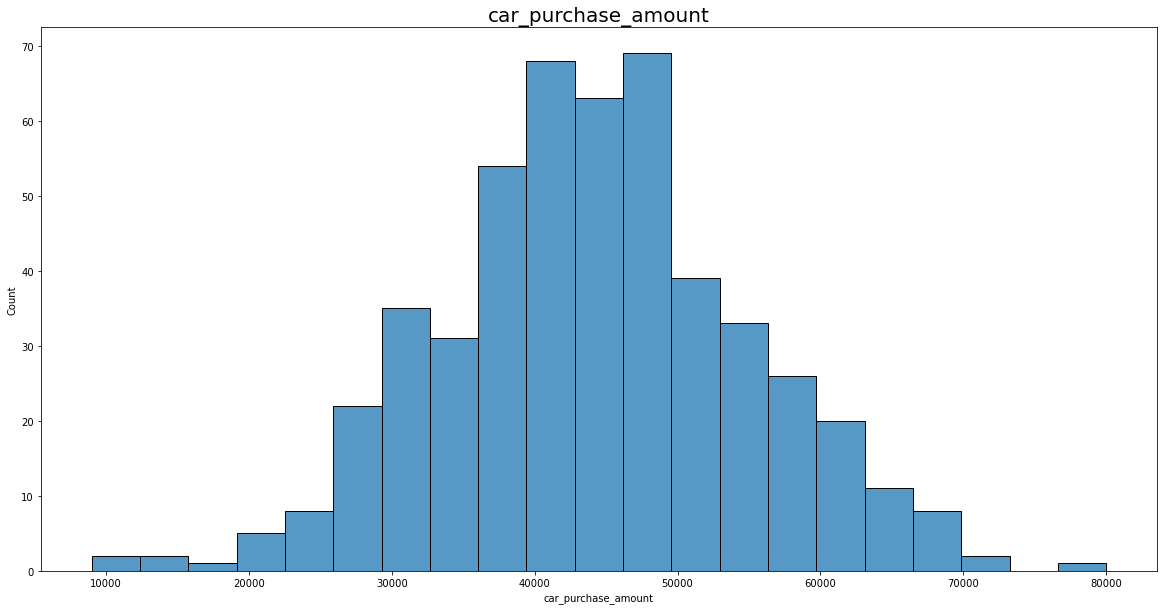

In [8]:
sns.histplot(df.car_purchase_amount)
plt.title("car_purchase_amount", size=20)
plt.show()

> Looks like our target variable has a normal distribution.  
> And we don't need to make transfomations for it, all ML alghorithms will have good performance.


## Object values: Customer name, customer email, country

### Customer's name

In [9]:
df.customer_name.sample(10)

291      Rachel E. Suarez
354      Oneill, Tiger A.
155        Darius Herring
319       Schultz, Lee I.
412                Dexter
172         Philip Barnes
372     Houston, Grant O.
219     Hanna C. Martinez
75          Hedley Greene
202    Hammett A. Manning
Name: customer_name, dtype: object

In [10]:
df.customer_name.value_counts()[:5]

Seth                    2
Walter                  2
Martina Avila           1
Sexton, Shaeleigh H.    1
Holloway, Brennan Q.    1
Name: customer_name, dtype: int64

> This feature is useless for our model. It's just a name of a person.  
> So drop it.

### Customer's email

In [11]:
df.customer_email.sample(10)

98                sit.amet.orci@facilisis.edu
422          diam.nunc@lectusconvallisest.org
34     nascetur.ridiculus.mus@dignissim.co.uk
225                   erat.Sed.nunc@aneque.ca
90               scelerisque@Vivamusnon.co.uk
155                         imperdiet@sem.edu
238                           sem.ut@odio.edu
55       dolor.nonummy@metusurnaconvallis.net
423            odio.Phasellus@fringilla.co.uk
120     sapien.imperdiet.ornare@vitaeerat.edu
Name: customer_email, dtype: object

> We can use the last domain name from email  
> for example:  
> pellentesque.a.facilisis@nonlacinia.co.uk -> .co.uk  
> Cras.eu@vitaevelitegestas.net -> .net  
>
> Maybe it can be usefull. In some cases, tt can show us in what industry a customer works.

### Country

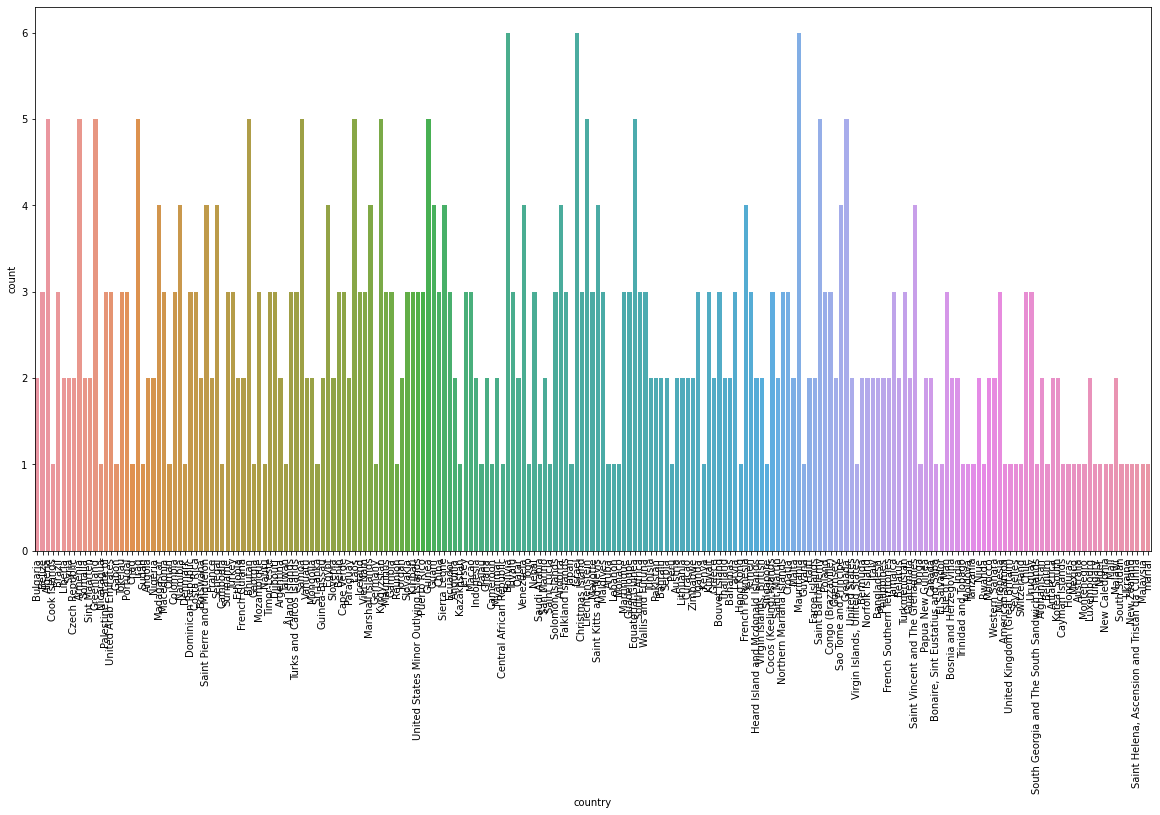

In [12]:
sns.countplot(x=df.country);
plt.xticks(rotation=90);
plt.show();

> There are very huge amount of countries, we need reduce it's amount.  
> For this I enriched dataset with country information.

## Categorical variables: Gender

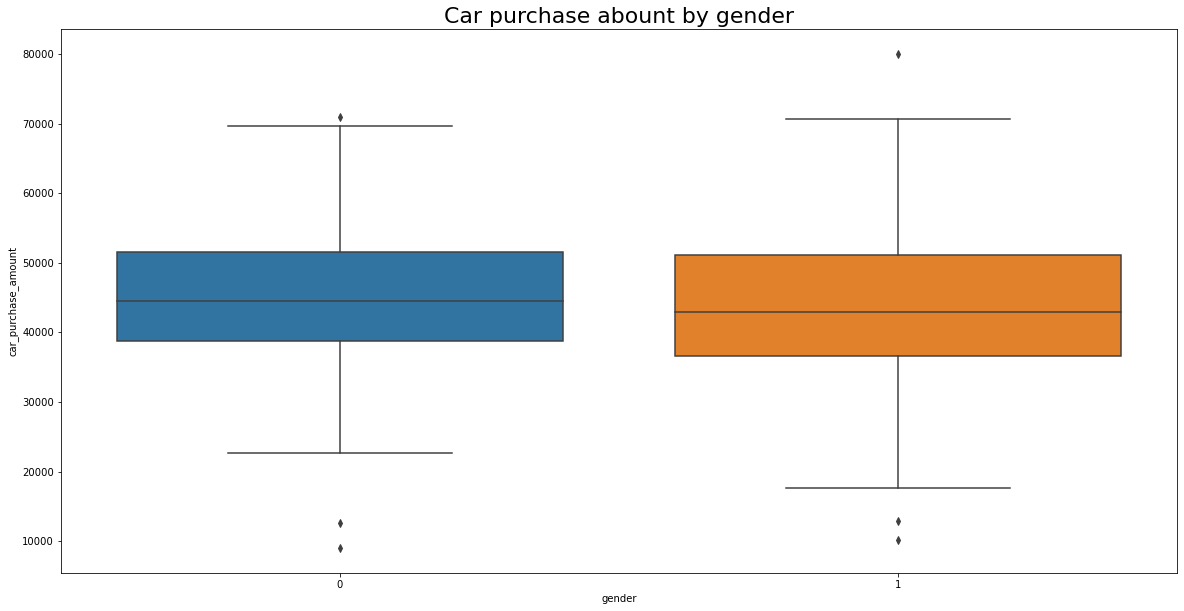

In [13]:
ax = sns.boxplot(data=df, x="gender", y="car_purchase_amount")
plt.title("Car purchase abount by gender", size=22)
plt.show()

> There is a little difference in target variable by gender, but not sufficient

## Numerical variables

- Age
- Anual salary
- Credit care debt
- Net worth

In [14]:
df_numerical = df.select_dtypes([int,float]).drop(["gender"], axis=1)

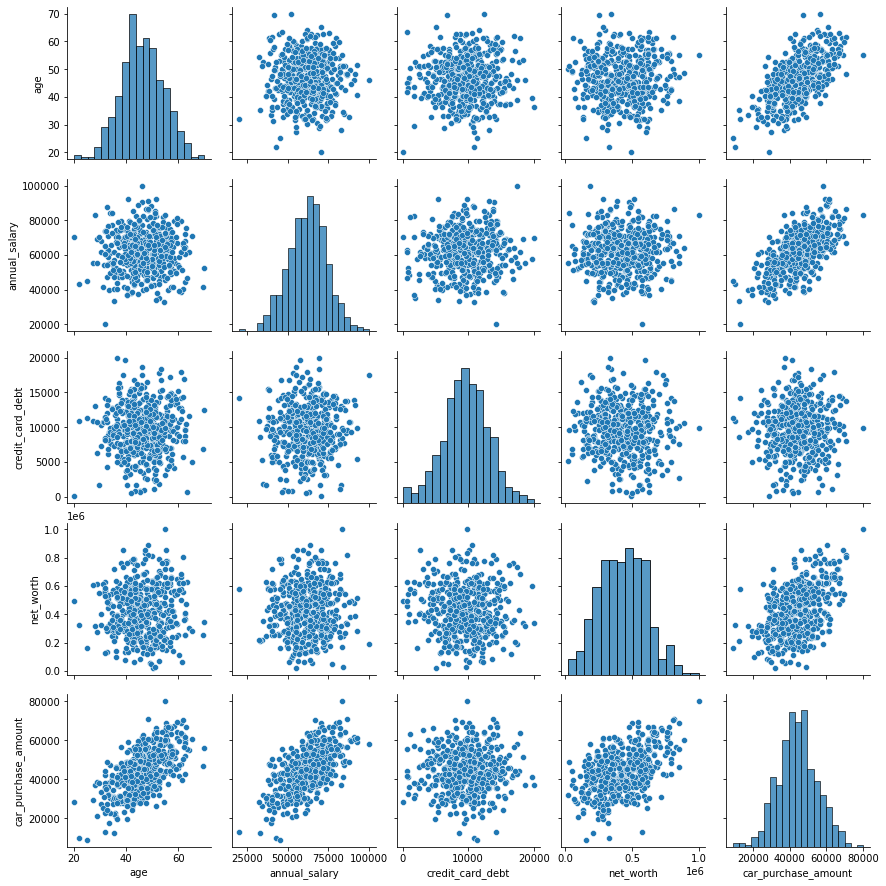

In [15]:
sns.pairplot(df_numerical);
plt.show()

### Let's look for correlation matrix

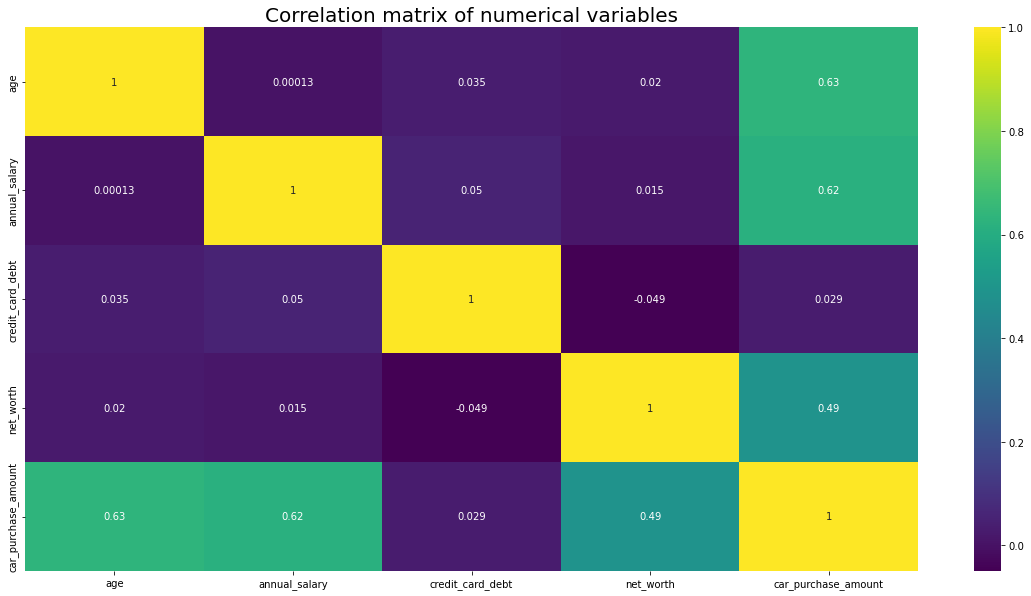

In [16]:
sns.heatmap(df_numerical.corr(), cmap='viridis', annot=True);
plt.title("Correlation matrix of numerical variables", size=20)
plt.show()

> In analysis of numerical variables I found:
> - all variables have normal distribution
> - all variables have different range of values
> - they are not correlated between each other
> - but 3 variables (age, annual salary and net worth) have a sufficient correlation with target variable

# Conclusion of EDA

> 1. It's a very small dataset, but I'll try create a usefull model with him
> 2. Target variable is very correlated with age and anual salary (what makes sense)
> 3. We need external data about countries, to gain more information about customer (such as continent, GDP)


# Data preporation

## Extract domain from email

In [17]:
email_suffix = df.customer_email.str.split('@').apply(lambda x: x[1][x[1].find('.'):])

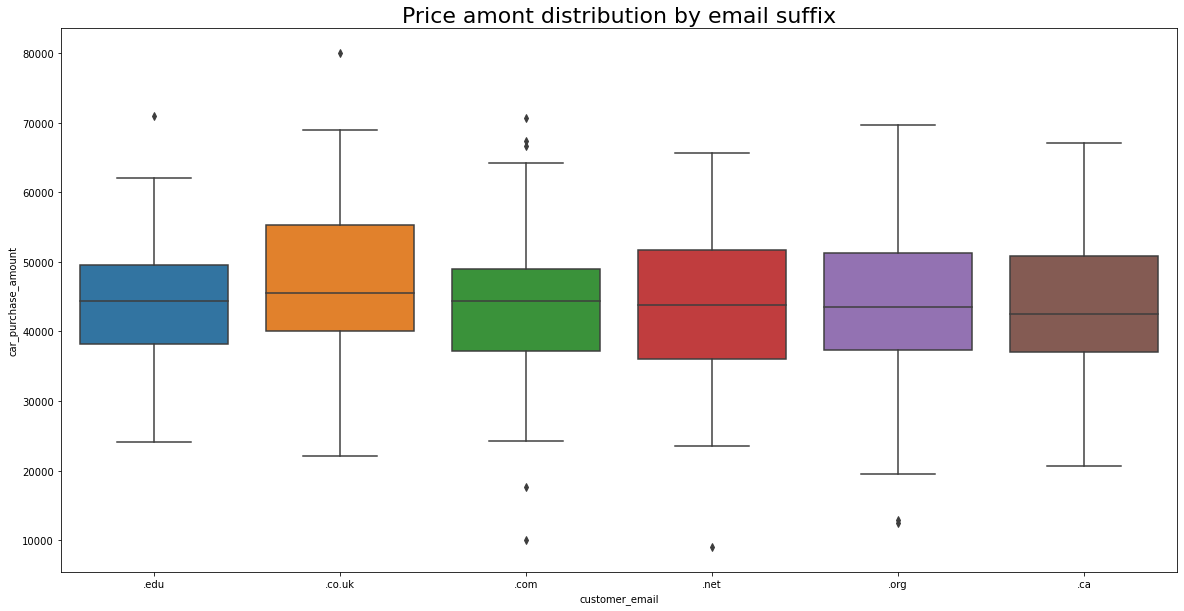

In [18]:
sns.boxplot(x=email_suffix, y=df.car_purchase_amount);
plt.title("Price amont distribution by email suffix", size=22)
plt.show()

In [19]:
df["customer_email_suffix"] = email_suffix

> I could include this categorical feature to our dataset

## Enrich with countries data

### Look at countries dataset

In [20]:
countries_df = pd.read_csv("../data/raw/countries_of_the_world.csv", decimal=",")
countries_columns = [
    "Country",
    "Region",
    "Population",
    "Area (sq. mi.)",
    "Pop. Density (per sq. mi.)",
    "Coastline (coast/area ratio)",
    "GDP ($ per capita)",
    "Birthrate",
    "Deathrate"
    
]
countries_df = countries_df[countries_columns]
countries_df.columns = countries_df.columns\
    .str.replace(" ", "_")\
    .str.replace("[-|(|)|\.|//|\$|\%]","", regex=True)\
    .str.lower()

In [21]:
countries_df.head(3)

,country,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_coastarea_ratio,gdp__per_capita,birthrate,deathrate
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,700.0,46.60,20.34
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,4500.0,15.11,5.22
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,6000.0,17.14,4.61


In [22]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    227 non-null    object 
 1   region                     227 non-null    object 
 2   population                 227 non-null    int64  
 3   area_sq_mi                 227 non-null    int64  
 4   pop_density_per_sq_mi      227 non-null    float64
 5   coastline_coastarea_ratio  227 non-null    float64
 6   gdp__per_capita            226 non-null    float64
 7   birthrate                  224 non-null    float64
 8   deathrate                  223 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 16.1+ KB


In [23]:
countries_df.fillna(0, inplace=True)

In [24]:
countries_df.country = countries_df.country.str.strip()

In [25]:
countries_df.head()

,country,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_coastarea_ratio,gdp__per_capita,birthrate,deathrate
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,700.0,46.60,20.34
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,4500.0,15.11,5.22
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,6000.0,17.14,4.61
3,American Samoa,OCEANIA,57794,199,290.4,58.29,8000.0,22.46,3.27
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,19000.0,8.71,6.25


### Add row to country_df for unknown country 

In [26]:
unknown_country = pd.DataFrame.from_dict({
    "country": ["UNKNOWN"],
    "region": ["UNKNOWN"],
    "population": [0],
    "area_sq_mi": [0],
    "pop_density_per_sq_mi": [0],
    "coastline_coastarea_ratio": [0],
    "gdp__per_capita": [0],
    "birthrate": [0],
    "deathrate": [0],
}, orient="columns")

In [27]:
countries_df = pd.concat([countries_df,unknown_country])

> I picked up only 8 usefull columns (by my opinion)  
> There ara a few missing values, I filled them with 0  
> Column county was havving a space, I removed it  
> Add country UNKNOWN for not matched rows

### Let's try to match our datasets

In [28]:
countries_not_in_external_dataset = list(df[~df.country.isin(countries_df.country)].country.unique())
countries_not_in_external_dataset.sort()
pprint(countries_not_in_external_dataset)

['Antarctica',
 'Bahamas',
 'Bonaire, Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Bouvet Island',
 'Central African Republic',
 'Christmas Island',
 'Cocos (Keeling) Islands',
 'Congo (Brazzaville)',
 'Curaçao',
 'Falkland Islands',
 'French Southern Territories',
 'Gambia',
 'Heard Island and Mcdonald Islands',
 'Macao',
 'Micronesia',
 'Montenegro',
 'Myanmar',
 'Niue',
 'Norfolk Island',
 'Northern Mariana Islands',
 'Palestine, State of',
 'Saint Barthélemy',
 'Saint Helena, Ascension and Tristan da Cunha',
 'Saint Kitts and Nevis',
 'Saint Martin',
 'Saint Pierre and Miquelon',
 'Saint Vincent and The Grenadines',
 'Sao Tome and Principe',
 'Sint Maarten',
 'South Georgia and The South Sandwich Islands',
 'South Sudan',
 'Timor-Leste',
 'Tokelau',
 'Trinidad and Tobago',
 'Turks and Caicos Islands',
 'United Kingdom (Great Britain)',
 'United States Minor Outlying Islands',
 'Viet Nam',
 'Virgin Islands, British',
 'Virgin Islands, United States',
 'marlal',
 'Åland Isl

In [29]:
df.country = df.country\
    .str.replace("Bahamas", "Bahamas, The")\
    .str.replace("Central African Republic", "Central African Rep.")\
    .str.replace("Falkland Islands", "Argentina")\
    .str.replace("Macao", "Macau")\
    .str.replace("Micronesia", "Micronesia, Fed. St.")\
    .str.replace("Montenegro", "Serbia")\
    .str.replace("Trinidad and Tobago", "Trinidad & Tobago")\
    .str.replace("United Kingdom (Great Britain)", "United Kingdom", regex=False)\
    .str.replace("United States Minor Outlying Islands", "United States")\
    .str.replace("Viet Nam", "Vietnam")\
    .str.replace("Virgin Islands, British", "United Kingdom")\
    .str.replace("Virgin Islands, United States", "United States")\
    .str.replace("Bosnia and Herzegovina", "Bosnia & Herzegovina")


In [30]:
countries_not_in_external_dataset = list(df[~df.country.isin(countries_df.country)].country.unique())
countries_not_in_external_dataset.sort()
pprint(countries_not_in_external_dataset)

['Antarctica',
 'Bonaire, Sint Eustatius and Saba',
 'Bouvet Island',
 'Christmas Island',
 'Cocos (Keeling) Islands',
 'Congo (Brazzaville)',
 'Curaçao',
 'French Southern Territories',
 'Gambia',
 'Heard Island and Mcdonald Islands',
 'Myanmar',
 'Niue',
 'Norfolk Island',
 'Northern Mariana Islands',
 'Palestine, State of',
 'Saint Barthélemy',
 'Saint Helena, Ascension and Tristan da Cunha',
 'Saint Kitts and Nevis',
 'Saint Martin',
 'Saint Pierre and Miquelon',
 'Saint Vincent and The Grenadines',
 'Sao Tome and Principe',
 'Sint Maarten',
 'South Georgia and The South Sandwich Islands',
 'South Sudan',
 'Timor-Leste',
 'Tokelau',
 'Turks and Caicos Islands',
 'marlal',
 'Åland Islands']


In [31]:
df.loc[~df.country.isin(countries_df.country), "country"] = "UNKNOWN"

> I tried to match country in my main dataset with countries dataset,  
> but for rest of countries (not matched) I set UKKNOWN

### Merge datasets

In [32]:
df = df.merge(countries_df, how='left', on='country')

In [33]:
df.head()

,customer_name,customer_email,country,gender,age,annual_salary,credit_card_debt,net_worth,car_purchase_amount,customer_email_suffix,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_coastarea_ratio,gdp__per_capita,birthrate,deathrate
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,.edu,EASTERN EUROPE,7385367,110910,66.6,0.32,7600.0,9.65,14.27
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,.co.uk,LATIN AMER. & CARIB,287730,22966,12.5,1.68,4900.0,28.84,5.72
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,.co.uk,NORTHERN AFRICA,32930091,2381740,13.8,0.04,6000.0,17.14,4.61
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,.com,OCEANIA,21388,240,89.1,50.00,5000.0,21.00,0.00
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,.net,LATIN AMER. & CARIB,188078227,8511965,22.1,0.09,7600.0,16.56,6.17


## Drop useless columns

In [34]:
columns_to_drop = [
    "customer_name",
    "customer_email",
    "country"
]
df.drop(columns_to_drop, axis=1, inplace=True, errors=False)

## Final dataset

In [35]:
df.head(3)

,gender,age,annual_salary,credit_card_debt,net_worth,car_purchase_amount,customer_email_suffix,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_coastarea_ratio,gdp__per_capita,birthrate,deathrate
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,.edu,EASTERN EUROPE,7385367,110910,66.6,0.32,7600.0,9.65,14.27
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,.co.uk,LATIN AMER. & CARIB,287730,22966,12.5,1.68,4900.0,28.84,5.72
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,.co.uk,NORTHERN AFRICA,32930091,2381740,13.8,0.04,6000.0,17.14,4.61


In [36]:
df.to_csv("../data/processed/main_data.csv")
countries_df.to_csv("../data/processed/countries_data.csv")

# Conclusion
> I analyzed the dataset  
> Found important features (age, anual salary, net worth)  
> Enriched data with information about country  
> Create featre email_suffix  
> Drop useless data  
> Prepared dataset for ML alghorithms